In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Carregar o dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar os pixels (0 a 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


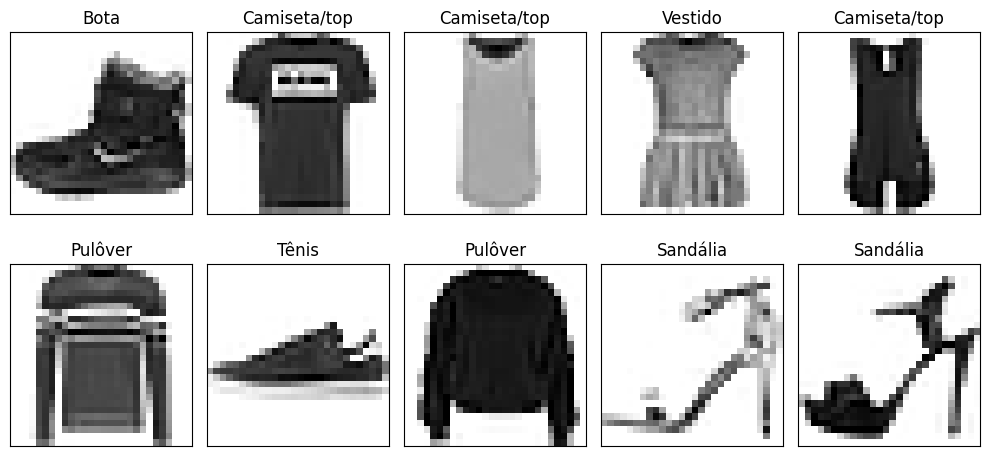

In [ ]:
# Labels do Fashion MNIST
class_names = ['Camiseta/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Mostrar as 10 primeiras imagens de treino
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [ ]:
# Ajustar forma dos dados para CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Construir a CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.7646 - loss: 0.6576 - val_accuracy: 0.8657 - val_loss: 0.3716
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8809 - loss: 0.3271 - val_accuracy: 0.8819 - val_loss: 0.3239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8994 - loss: 0.2755 - val_accuracy: 0.8963 - val_loss: 0.2822
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9107 - loss: 0.2422 - val_accuracy: 0.8949 - val_loss: 0.2808
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9218 - loss: 0.2130 - val_accuracy: 0.9068 - val_loss: 0.2520


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Acurácia final: {test_acc:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9069 - loss: 0.2593
Acurácia final: 90.68%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


Text(0.5, 1.0, 'Classe real: Bota\nPredita: Bota')

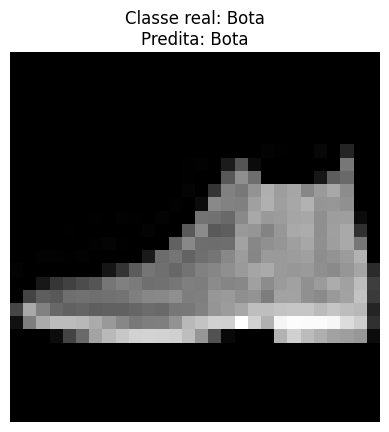

In [ ]:
import numpy as np

predictions = model.predict(x_test)

# Mostrar uma previsão
i = 0
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(f'Classe real: {class_names[y_test[i]]}\nPredita: {class_names[np.argmax(predictions[i])]}')

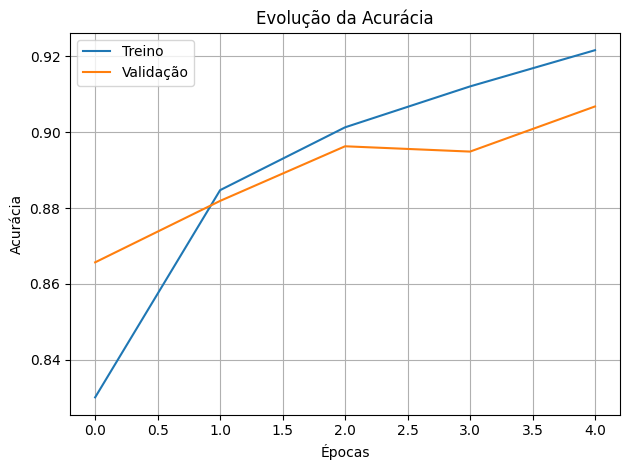

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
